- Lakukan hypothesis testing terhadap dataset diatas.
- Ambil kesimpulan dari hasil analisa

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [97]:
df_covid19_indo = pd.read_csv('./covid19-indonesia/covid_19_indonesia_time_series_all.csv')

#for printing all (string-)content in a cell:
#print five top data
pd.set_option('display.max_colwidth', None)
df_covid19_indo.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [98]:
df_covid19_indo['Date'] = pd.to_datetime(df_covid19_indo['Date'])

In [99]:
df_covid19_jkt = df_covid19_indo[(df_covid19_indo["Location"]=="DKI Jakarta")]
df_covid19_jkt

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
8,2020-03-04,ID-JK,DKI Jakarta,2,0,0,2,45,20,41,...,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,91.11%,1.00,1.0
12,2020-03-05,ID-JK,DKI Jakarta,0,1,0,-1,45,21,41,...,-6.204699,0.00,4.15,0.09,1.94,0.19,46.67%,91.11%,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,2021-11-28,ID-JK,DKI Jakarta,51,0,52,-1,863862,13596,849803,...,-6.204699,4.70,79646.92,0.00,1253.53,125.35,1.57%,98.37%,0.94,1.0
21635,2021-11-29,ID-JK,DKI Jakarta,41,0,71,-30,863903,13596,849874,...,-6.204699,3.78,79650.70,0.00,1253.53,125.35,1.57%,98.38%,0.80,1.0
21668,2021-11-30,ID-JK,DKI Jakarta,44,0,0,44,863947,13596,849874,...,-6.204699,4.06,79654.75,0.00,1253.53,125.35,1.57%,98.37%,1.07,1.0
21701,2021-12-01,ID-JK,DKI Jakarta,70,0,1,69,864017,13596,849875,...,-6.204699,6.45,79661.21,0.00,1253.53,125.35,1.57%,98.36%,1.59,1.0


In [100]:
df_covid19_jkt_daily = df_covid19_jkt.groupby(pd.Grouper(key='Date', axis=0, freq='D')).sum()

In [101]:
df_covid19_jkt_daily

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,2,0,0,2,39,20,41,-22,0.0,1,...,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,0.00,0.0
2020-03-02,2,0,0,2,41,20,41,-20,0.0,1,...,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,1.00,1.0
2020-03-03,2,0,0,2,43,20,41,-18,0.0,1,...,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,1.00,1.0
2020-03-04,2,0,0,2,45,20,41,-16,0.0,1,...,16334.31,106.836118,-6.204699,0.18,4.15,0.00,1.84,0.18,1.00,1.0
2020-03-05,0,1,0,-1,45,21,41,-17,0.0,1,...,16334.31,106.836118,-6.204699,0.00,4.15,0.09,1.94,0.19,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,51,0,52,-1,863862,13596,849803,463,0.0,1,...,16334.31,106.836118,-6.204699,4.70,79646.92,0.00,1253.53,125.35,0.94,1.0
2021-11-29,41,0,71,-30,863903,13596,849874,433,0.0,1,...,16334.31,106.836118,-6.204699,3.78,79650.70,0.00,1253.53,125.35,0.80,1.0
2021-11-30,44,0,0,44,863947,13596,849874,477,0.0,1,...,16334.31,106.836118,-6.204699,4.06,79654.75,0.00,1253.53,125.35,1.07,1.0


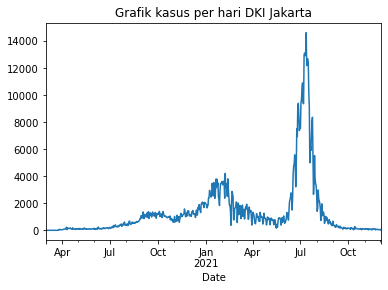

In [102]:
df_covid19_jkt_daily["New Cases"].plot()
plt.title("Grafik kasus per hari DKI Jakarta");

In [103]:
df_covid19_indo["Location"].unique()

array(['DKI Jakarta', 'Indonesia', 'Riau', 'Jawa Barat', 'Banten',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

In [104]:
df_covid19_jabar = df_covid19_indo[(df_covid19_indo["Location"]=="Jawa Barat")]
df_covid19_jabar

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
6,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN,NaN
10,2020-03-04,ID-JB,Jawa Barat,1,0,0,1,2,1,8,...,-6.920432,0.02,0.04,0.00,0.02,0.00,50.00%,400.00%,1.00,0.0
14,2020-03-05,ID-JB,Jawa Barat,1,0,0,1,3,1,8,...,-6.920432,0.02,0.07,0.00,0.02,0.00,33.33%,266.67%,1.00,1.0
19,2020-03-06,ID-JB,Jawa Barat,1,0,0,1,4,1,8,...,-6.920432,0.02,0.09,0.00,0.02,0.00,25.00%,200.00%,1.00,1.0
24,2020-03-07,ID-JB,Jawa Barat,0,0,0,0,4,1,8,...,-6.920432,0.00,0.09,0.00,0.02,0.00,25.00%,200.00%,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,2021-11-28,ID-JB,Jawa Barat,25,0,28,-3,707696,14732,691935,...,-6.920432,0.55,15670.40,0.00,326.21,32.62,2.08%,97.77%,0.56,0.0
21639,2021-11-29,ID-JB,Jawa Barat,29,2,95,-68,707725,14734,692030,...,-6.920432,0.64,15671.04,0.04,326.25,32.63,2.08%,97.78%,1.16,NaN
21672,2021-11-30,ID-JB,Jawa Barat,68,3,57,8,707793,14737,692087,...,-6.920432,1.51,15672.55,0.07,326.32,32.63,2.08%,97.78%,2.34,1.5
21705,2021-12-01,ID-JB,Jawa Barat,58,0,8,50,707851,14737,692095,...,-6.920432,1.28,15673.83,0.00,326.32,32.63,2.08%,97.77%,0.85,0.0


In [105]:
df_covid19_jabar_daily = df_covid19_jabar.groupby(pd.Grouper(key='Date', axis=0, freq='D')).sum()

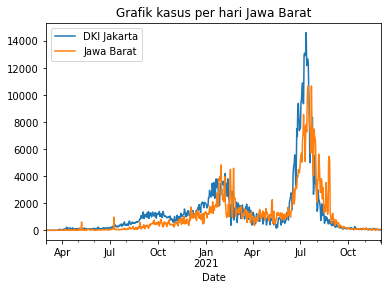

In [119]:
df_covid19_jkt_daily["New Cases"].plot(label='DKI Jakarta')
plt.title("Grafik kasus per hari DKI Jakarta");
df_covid19_jabar_daily["New Cases"].plot(label='Jawa Barat')
plt.title("Grafik kasus per hari Jawa Barat");
plt.legend()
plt.show()

## Hypothesis Testing


Di awal bulan Mei sampai akhir Agustus 2021 kasus baru covid-19 mengalami kenaikan yang sangat tajam, kita ingin membandingkan rata-rata kasus baru di bulan tersebut pada daerah provinsi DKI Jakarta dan Jawa Barat. peneliti mengklaim bahwa rata-rata kenaikan harian kasus baru pada dua provinsi yang disebutkan adalah tidak berbeda secara signifikan. Kita akan uji dengan menggunakan significant level 5% 

Our hypothesis on this case:

**H0: μ_DKI_Jakarta = μ_Jawa_Barat**

**H1: μ_DKI_Jakarta != μ_Jawa_Barat**

In [120]:
new_cases_jkt_filter = df_covid19_jkt.loc[(df_covid19_jkt['Date'] >= '2021-05-01') & (df_covid19_jkt['Date'] <= '2021-08-31')].groupby('Date').sum().sample(123)
new_cases_jbr_filter = df_covid19_jabar.loc[(df_covid19_jabar['Date'] >= '2021-05-01') & (df_covid19_jabar['Date'] <= '2021-08-31')].groupby('Date').sum().sample(123)

print('Average new cases of DKI Jakarta a day: {}'.format(np.round(new_cases_jkt_filter["New Cases"].mean())))
print('Average new cases of Jawa Barat a day: {}'.format(np.round(new_cases_jbr_filter["New Cases"].mean())))

Average new cases of DKI Jakarta a day: 3593.0
Average new cases of Jawa Barat a day: 3319.0


In [121]:
print('Banyak Data DKI Jakarta: ', new_cases_jkt_filter.shape[0])
print('Banyak Data Jawa Barat: ', new_cases_jbr_filter.shape[0])

Banyak Data DKI Jakarta:  123
Banyak Data Jawa Barat:  123


In [110]:
t_stat, p_val = stats.ttest_ind(new_cases_jkt_filter, new_cases_jbr_filter)

print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.6493873578488449
t-statistics: 0.45530687332458686


C:\Users\sivis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


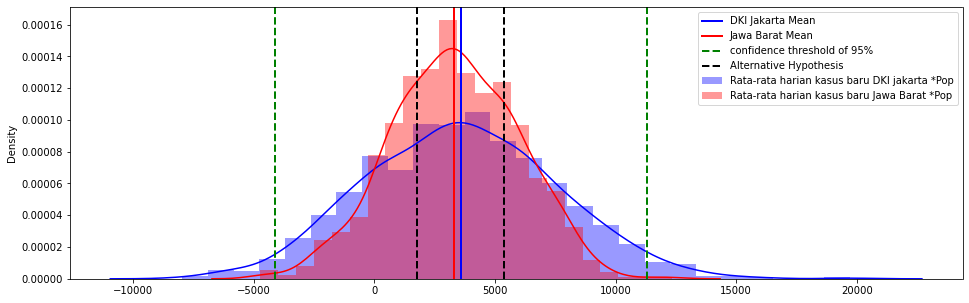

In [122]:
new_cases_jkt_pop = np.random.normal(new_cases_jkt_filter["New Cases"].mean(), new_cases_jkt_filter["New Cases"].std(), 1000)
new_cases_jbr_pop = np.random.normal(new_cases_jbr_filter["New Cases"].mean(), new_cases_jbr_filter["New Cases"].std(), 1000)

ci = stats.norm.interval(0.95, new_cases_jkt_filter["New Cases"].mean(), new_cases_jkt_filter["New Cases"].std())
plt.figure(figsize=(16, 5))
sns.distplot(new_cases_jkt_pop, label="Rata-rata harian kasus baru DKI jakarta *Pop", color='blue')
sns.distplot(new_cases_jbr_pop, label="Rata-rata harian kasus baru Jawa Barat *Pop", color='red')

plt.axvline(new_cases_jkt_filter["New Cases"].mean(), color='blue', linewidth=2, label="DKI Jakarta Mean")
plt.axvline(new_cases_jbr_filter["New Cases"].mean(), color='red', linewidth=2, label='Jawa Barat Mean')


plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(new_cases_jkt_pop.mean()+t_stat[0]*new_cases_jkt_pop.std(), color='black', linestyle='dashed',  linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(new_cases_jkt_pop.mean()-t_stat[0]*new_cases_jkt_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()


Based on the result above, we can conclude that we accept the null hypothesis which between the DKI Jakarta and Jawa Barat are not significantly different in terms of average new cases per day.